<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_Basic_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Reading Stock Market Data / NSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm <br>
For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>
Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0


##Load NSE Data in CSV format

In [1]:
#NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm
#Sample Data on four companies are available here
#!wget -O hdfc.csv 'https://drive.google.com/uc?export=download&id=1_-cuaL3KlSL2rlnjLkxENCItav_vr8ua' # HDFC Bank
#!wget -O hulv.csv 'https://drive.google.com/uc?export=download&id=1EVInuQzPtUUGhOzkWO7ZGqoaX1uc6l2g' # Hindustan Unilever
#!wget -O tata.csv 'https://drive.google.com/uc?export=download&id=18zpQLVB3mwy2SxUjDHr7Pnfu2vxjt65f' # Tata Steel
#!wget -O lnto.csv 'https://drive.google.com/uc?export=download&id=1CQxXKFXZKDp0BHaiifY87-zM9ip3tpzt' # Larsen & Toubr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfchk = pd.read_csv('hdfc.csv', delimiter = ',')
#dfchk = pd.read_csv(nseData, delimiter = ',')
dfchk.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFCBANK,EQ,03-Jan-2022,1479.40,1485.0,1523.00,1480.50,1519.80,1519.65,1507.81,4534592,6.837317e+09,149449
1,HDFCBANK,EQ,04-Jan-2022,1519.65,1520.0,1532.90,1507.80,1528.05,1528.55,1521.68,4428676,6.739032e+09,134455
2,HDFCBANK,EQ,05-Jan-2022,1528.55,1536.8,1572.00,1528.10,1562.10,1564.85,1554.91,7166319,1.114299e+10,208851
3,HDFCBANK,EQ,06-Jan-2022,1564.85,1543.0,1554.75,1530.05,1540.00,1539.75,1540.71,4814465,7.417694e+09,143958
4,HDFCBANK,EQ,07-Jan-2022,1539.75,1544.0,1566.75,1535.90,1552.75,1550.55,1552.05,5589692,8.675466e+09,166966


In [4]:
#Check whether the CSV data has been loaded correctly or not

dfchk = pd.read_csv('lnto.csv', delimiter = ',')
dfchk.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,LT,EQ,03-Jan-2022,1895.90,1895.00,1937.45,1893.65,1924.0,1922.85,1923.55,1906676,3.667582e+09,78718
1,LT,EQ,04-Jan-2022,1922.85,1922.85,1943.00,1914.55,1937.5,1937.55,1930.71,1643920,3.173938e+09,61437
2,LT,EQ,05-Jan-2022,1937.55,1940.70,1951.00,1927.65,1945.8,1948.60,1939.88,1711667,3.320422e+09,64313
3,LT,EQ,06-Jan-2022,1948.60,1944.50,1953.00,1919.60,1924.5,1924.50,1931.24,1372015,2.649687e+09,75564
4,LT,EQ,07-Jan-2022,1924.50,1929.05,1934.95,1897.15,1906.0,1904.90,1911.48,1447123,2.766142e+09,65033


#Basic Charts

##One Company Data

In [5]:
dfHDFC = pd.read_csv('hdfc.csv', delimiter = ',')
dfHDFC.count()
dfHDFC.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFCBANK,EQ,03-Jan-2022,1479.40,1485.0,1523.00,1480.50,1519.80,1519.65,1507.81,4534592,6.837317e+09,149449
1,HDFCBANK,EQ,04-Jan-2022,1519.65,1520.0,1532.90,1507.80,1528.05,1528.55,1521.68,4428676,6.739032e+09,134455
2,HDFCBANK,EQ,05-Jan-2022,1528.55,1536.8,1572.00,1528.10,1562.10,1564.85,1554.91,7166319,1.114299e+10,208851
3,HDFCBANK,EQ,06-Jan-2022,1564.85,1543.0,1554.75,1530.05,1540.00,1539.75,1540.71,4814465,7.417694e+09,143958
4,HDFCBANK,EQ,07-Jan-2022,1539.75,1544.0,1566.75,1535.90,1552.75,1550.55,1552.05,5589692,8.675466e+09,166966


In [6]:
#Number of trading days / data points
dfHDFC.count()

Symbol                   248
Series                   248
Date                     248
Prev Close               248
Open Price               248
High Price               248
Low Price                248
Last Price               248
Close Price              248
Average Price            248
Total Traded Quantity    248
Turnover                 248
No. of Trades            248
dtype: int64

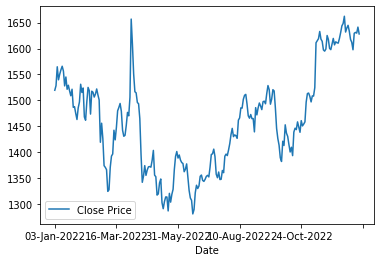

In [7]:
dfHDFC.plot(kind='line',x='Date',y='Close Price')

In [8]:
startDate = dfHDFC['Date'][dfHDFC.index[0]]
endDate = dfHDFC['Date'][dfHDFC.index[-1]]
print(startDate,endDate)

03-Jan-2022 30-Dec-2022


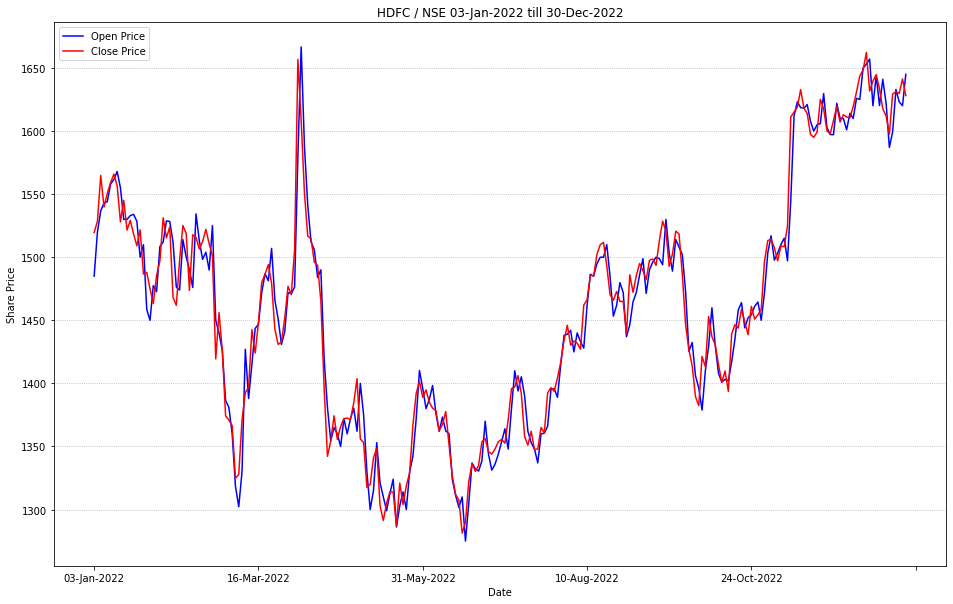

In [9]:
# Plotting directly from DataFrames with Pandas
dfHDFC.plot(
    x='Date', 
    y=['Open Price', 'Close Price'],
    kind='line', 
    legend=False, 
    color=['blue','red'],
    figsize=(16,10)
    
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC / NSE "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

Why did the HDFC Bank share price so much on 18th September ? [See](https://tradingqna.com/t/hdfc-bank-goes-ex-split-in-the-ratio-2-1-on-september-19-2019-here-s-how-it-impacts-your-equity-holdings-and-f-o-positions/63025)

##Compare Two Companies

In [10]:
dfHDFC = pd.read_csv('hdfc.csv', delimiter = ',')
dfHDFC.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFCBANK,EQ,03-Jan-2022,1479.40,1485.0,1523.0,1480.5,1519.80,1519.65,1507.81,4534592,6.837317e+09,149449
1,HDFCBANK,EQ,04-Jan-2022,1519.65,1520.0,1532.9,1507.8,1528.05,1528.55,1521.68,4428676,6.739032e+09,134455


In [11]:
dfHUL = pd.read_csv('hulv.csv', delimiter = ',')
dfHUL.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HINDUNILVR,EQ,03-Jan-2022,2360.15,2378.00,2378.0,2353.00,2362.85,2361.30,2363.28,879278,2.077981e+09,48907
1,HINDUNILVR,EQ,04-Jan-2022,2361.30,2368.95,2408.1,2355.35,2405.95,2401.25,2392.65,1484275,3.551349e+09,105903


In [12]:
df2Com = pd.merge(dfHDFC[['Date','Close Price']],dfHUL[['Date','Close Price']],on='Date')
df2Com.head(2)

,Date,Close Price_x,Close Price_y
0,03-Jan-2022,1519.65,2361.30
1,04-Jan-2022,1528.55,2401.25


In [13]:
df2Com = df2Com.rename(columns ={'Close Price_x':'HDFC','Close Price_y':'HUL'})
df2Com.head(2)

,Date,HDFC,HUL
0,03-Jan-2022,1519.65,2361.30
1,04-Jan-2022,1528.55,2401.25


In [14]:
startDate = df2Com['Date'][dfHDFC.index[0]]
endDate = df2Com['Date'][dfHDFC.index[-1]]
print(startDate,endDate)

03-Jan-2022 30-Dec-2022


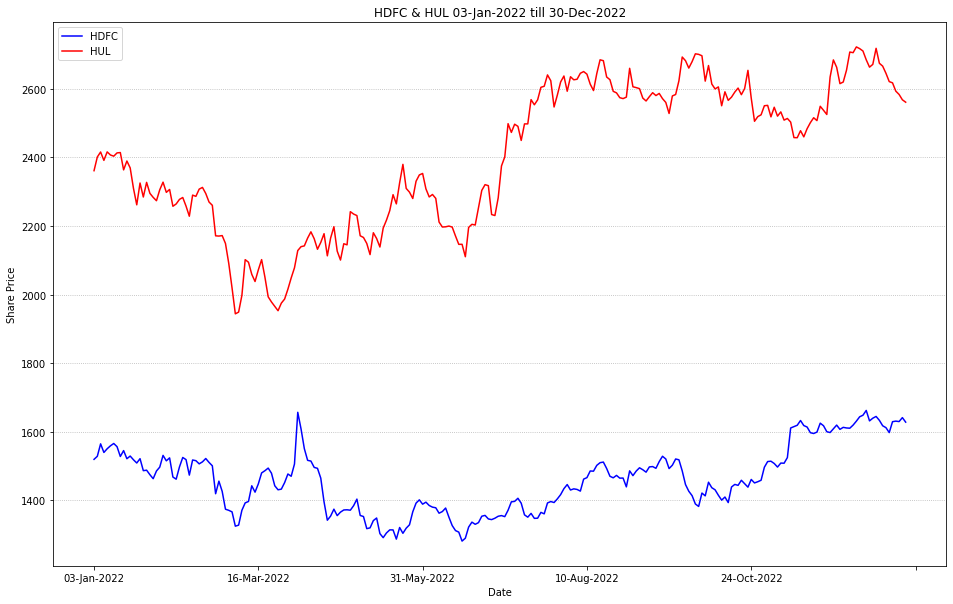

In [15]:
# Plotting directly from DataFrames with Pandas
df2Com.plot(
    x='Date', 
    y=['HDFC', 'HUL'],
    kind='line', 
    legend=False, 
    color=['blue','red'],
    figsize=(16,10)
    
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC & HUL "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

##Compare Three Companies

In [16]:
dfLNTO = pd.read_csv('lnto.csv', delimiter = ',')
dfLNTO.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,LT,EQ,03-Jan-2022,1895.90,1895.00,1937.45,1893.65,1924.0,1922.85,1923.55,1906676,3.667582e+09,78718
1,LT,EQ,04-Jan-2022,1922.85,1922.85,1943.00,1914.55,1937.5,1937.55,1930.71,1643920,3.173938e+09,61437


In [17]:
df3Com = pd.merge(df2Com[['Date','HDFC','HUL']],dfLNTO[['Date','Close Price']],on='Date')
df3Com.head(2)

,Date,HDFC,HUL,Close Price
0,03-Jan-2022,1519.65,2361.30,1922.85
1,04-Jan-2022,1528.55,2401.25,1937.55


In [18]:
df3Com = df3Com.rename(columns ={'Close Price':'L&T'})
df3Com.head(2)

,Date,HDFC,HUL,L&T
0,03-Jan-2022,1519.65,2361.30,1922.85
1,04-Jan-2022,1528.55,2401.25,1937.55


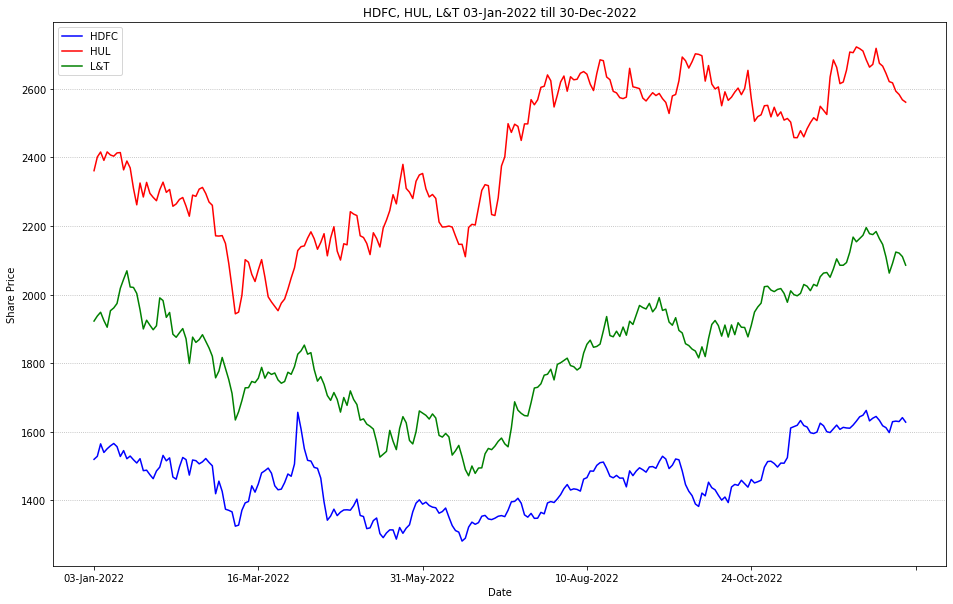

In [19]:
# Plotting directly from DataFrames with Pandas
df3Com.plot(
    x='Date', 
    y=['HDFC', 'HUL', 'L&T'],
    kind='line', 
    legend=False, 
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

#Scaling the Data

In [32]:
df = df3Com.copy()
df.head()

,Date,HDFC,HUL,L&T
0,03-Jan-2022,1519.65,2361.30,1922.85
1,04-Jan-2022,1528.55,2401.25,1937.55
2,05-Jan-2022,1564.85,2415.80,1948.60
3,06-Jan-2022,1539.75,2391.40,1924.50
4,07-Jan-2022,1550.55,2416.15,1904.90


In [33]:
df['HDFC'] = df['HDFC']/df['HDFC'][0]
df['HUL'] = df['HUL']/df['HUL'][0]
df['L&T'] = df['L&T']/df['L&T'][0]
df.head(10)

,Date,HDFC,HUL,L&T
0,03-Jan-2022,1.000000,1.000000,1.000000
1,04-Jan-2022,1.005857,1.016919,1.007645
2,05-Jan-2022,1.029744,1.023081,1.013392
3,06-Jan-2022,1.013227,1.012747,1.000858
4,07-Jan-2022,1.020334,1.023229,0.990665
5,10-Jan-2022,1.025993,1.019375,1.015732
6,11-Jan-2022,1.030435,1.017935,1.019918
7,12-Jan-2022,1.024348,1.021958,1.026705
8,13-Jan-2022,1.005495,1.022403,1.049692
9,14-Jan-2022,1.016780,1.001016,1.063395


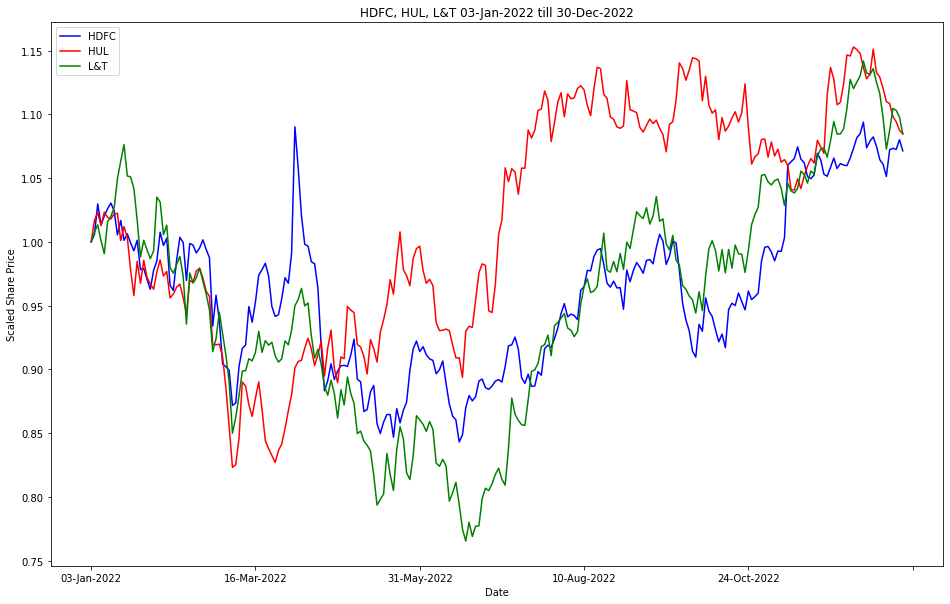

In [35]:
# Plotting directly from DataFrames with Pandas
df.plot(
    x='Date', 
    y=['HDFC', 'HUL', 'L&T'],
    kind='line', 
    legend=False, 
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Scaled Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()

#Simple Moving Average

In [40]:
df = pd.read_csv('hulv.csv', delimiter = ',')
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HINDUNILVR,EQ,03-Jan-2022,2360.15,2378.00,2378.0,2353.00,2362.85,2361.30,2363.28,879278,2.077981e+09,48907
1,HINDUNILVR,EQ,04-Jan-2022,2361.30,2368.95,2408.1,2355.35,2405.95,2401.25,2392.65,1484275,3.551349e+09,105903


In [42]:
#df.columns
dropCols = ['Symbol', 'Series',  'Prev Close', 'Last Price',  'Average Price', 'Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.head(3)

,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,03-Jan-2022,2378.00,2378.0,2353.00,2361.30,879278
1,04-Jan-2022,2368.95,2408.1,2355.35,2401.25,1484275
2,05-Jan-2022,2403.80,2420.0,2392.00,2415.80,1202512


In [43]:
df.rename(columns={'Open Price':'Open','High Price':'Hign','Low Price':'Low','Close Price':'Close','Total Traded Quantity':'Volume'}, inplace=True)
df.head(3)

,Date,Open,Hign,Low,Close,Volume
0,03-Jan-2022,2378.00,2378.0,2353.00,2361.30,879278
1,04-Jan-2022,2368.95,2408.1,2355.35,2401.25,1484275
2,05-Jan-2022,2403.80,2420.0,2392.00,2415.80,1202512


In [44]:
df.set_index('Date',inplace=True)
df.head(3)

,Open,Hign,Low,Close,Volume
Date,,,,,
03-Jan-2022,2378.00,2378.0,2353.00,2361.30,879278
04-Jan-2022,2368.95,2408.1,2355.35,2401.25,1484275
05-Jan-2022,2403.80,2420.0,2392.00,2415.80,1202512


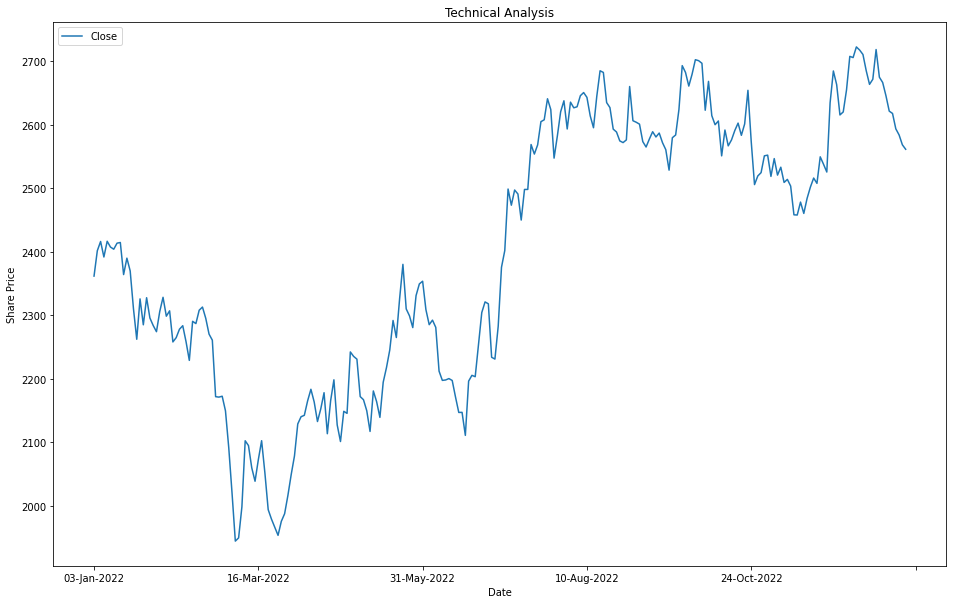

In [45]:
df.plot(y='Close', figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

In [46]:
df['SMA10'] = df['Close'].rolling(10).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

Open      248
Hign      248
Low       248
Close     248
Volume    248
SMA10     239
SMA30     219
dtype: int64

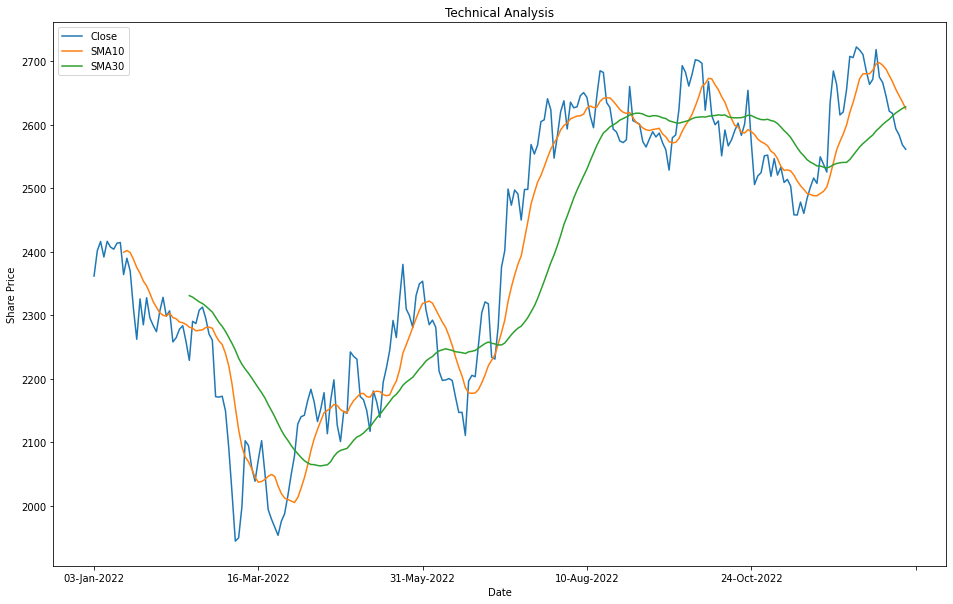

In [47]:
df.plot(y=['Close','SMA10','SMA30'], 
        figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

#Exercise 
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
get the data for three other companies and perform the same analysis

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)